# 1. Image Reading

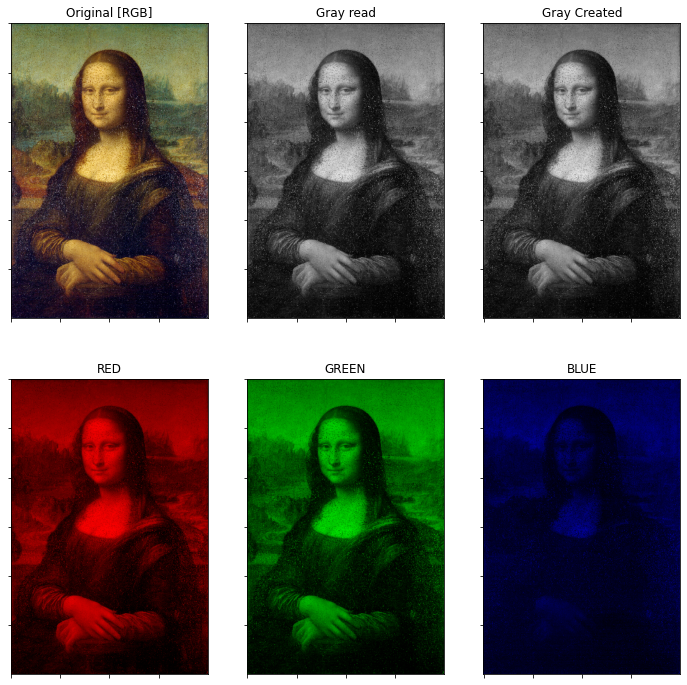

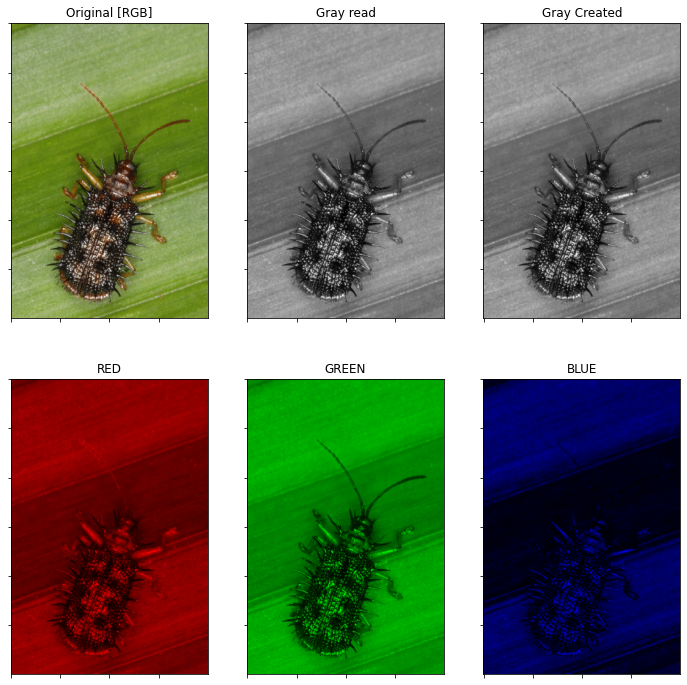

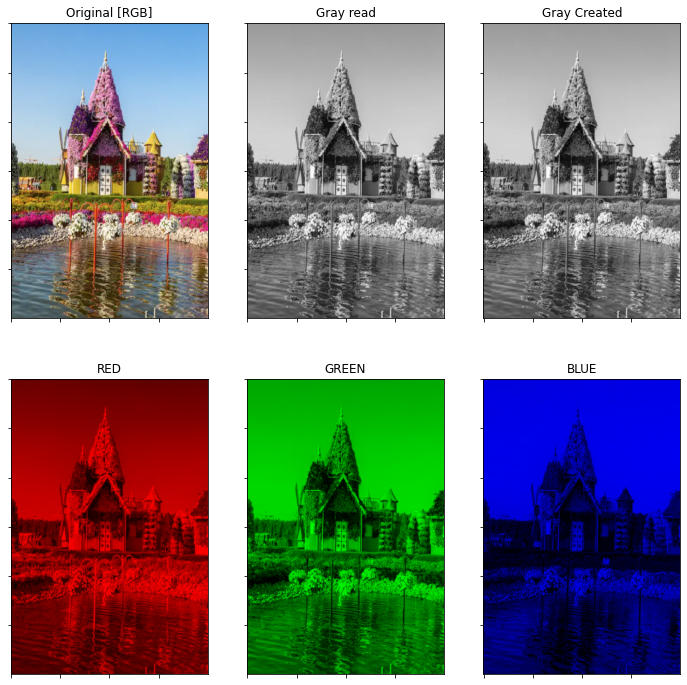

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from PIL import Image
import sys


def print_image (image):
    
    (m, n) = image.shape
    
    for i in range (0, m):
        print("\n")
        print([ image[i,j] for j in range (0, n)])
     
    

def plot_images (image_color, image_gray):
    
    (m, n, c) = image_color.shape 
  
    image_red    = image_color.copy()
    image_green  = image_color.copy()
    image_blue   = image_color.copy()

    image_red [:,:,1:] = 0 
    image_green [:,:,0] = 0 
    image_green [:,:,2] = 0 
    image_blue [:,:,0:2] =  0
    
    
    gray = np.zeros ([m,n])
    for i in range (0, m):
        for j in range (0, n):
            gray[i,j] = 0.29 * image_color[i,j,0]+ 0.587 * image_color[i,j,1] + 0.114 * image_color[i,j,2]
            
    
    fig, axs = plt.subplots (2,3,figsize=(12,12))
    
    axs[0,0].imshow (image_color)
    axs[0,1].imshow (image_gray,cmap='gray')
    axs[0,2].imshow (gray,cmap='gray')
    
    axs[1,0].imshow (image_red)
    axs[1,1].imshow (image_green)
    axs[1,2].imshow (image_blue)
    
    axs[0,0].set_title("Original [RGB]")
    axs[0,1].set_title ("Gray read")
    axs[0,2].set_title("Gray Created")
    axs[1,0].set_title("RED")
    axs[1,1].set_title("GREEN")
    axs[1,2].set_title("BLUE")

    
    for i in range (0,2):
        for j in range (0,3):
            axs[i,j].set_yticklabels([])
            axs[i,j].set_xticklabels([])
    plt.show()


if __name__ == "__main__":
    
    image1 = "data/Monalisa.jpg"
    image2 = "data/Hispine.jpg"
    image3 = "data/garden.png"
    
    for image in [image1,image2,image3]:
        image_color = cv2.imread(image, cv2.IMREAD_COLOR)
        image_color = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)
        image_gray  =  cv2.imread(image, cv2.IMREAD_GRAYSCALE)
        image_color = cv2.resize (image_color, (400, 600))
        image_gray  = cv2.resize (image_gray, (400, 600))
        plot_images (image_color, image_gray)
    
    
    
    
  

# 2. Color Distribution

Image shape: (300, 200, 3)
Image shape: (300, 200, 3)
Image shape: (300, 200, 3)


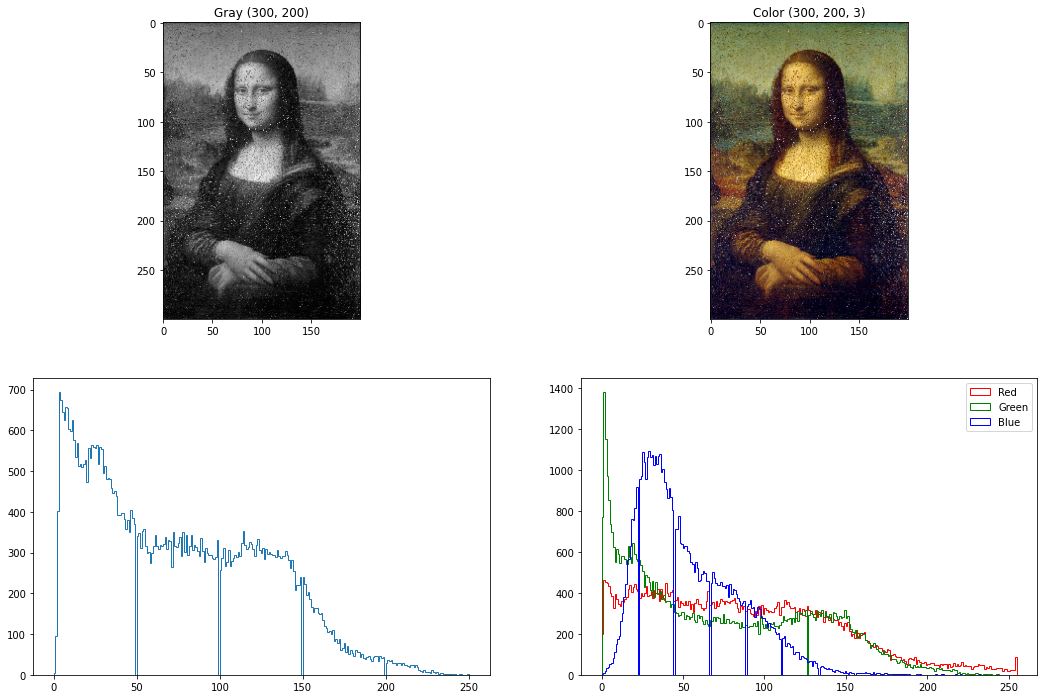

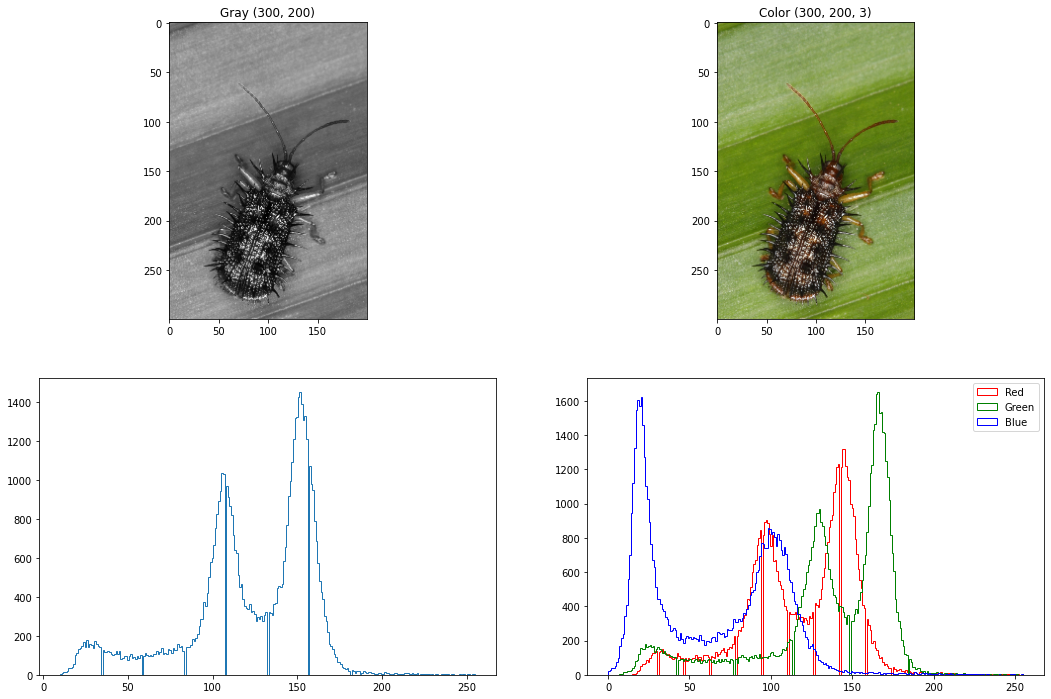

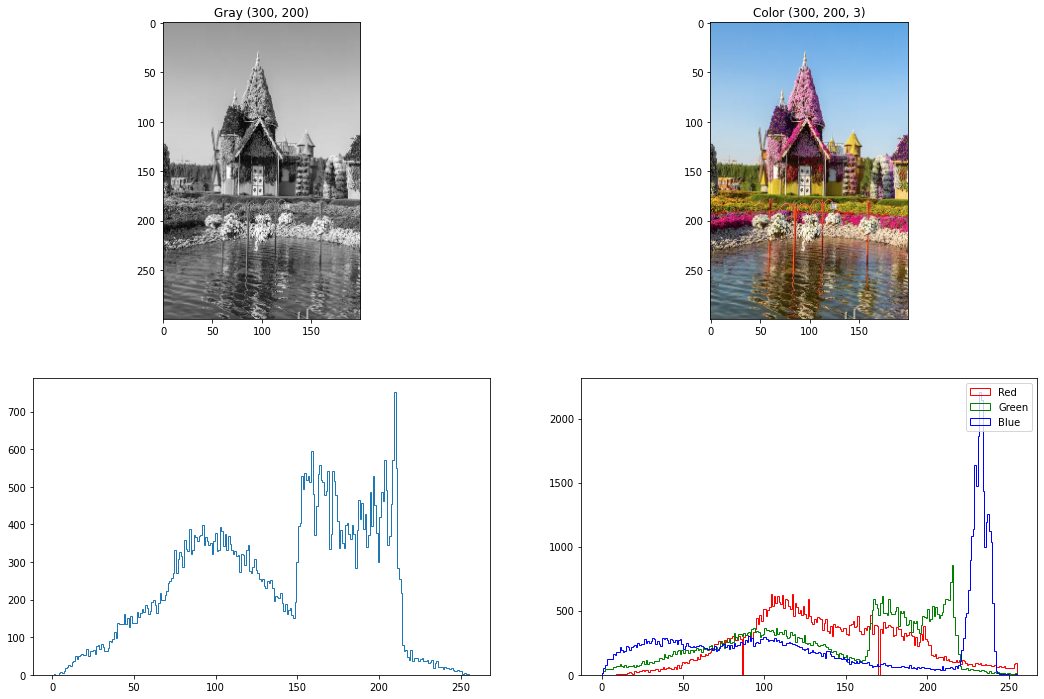

In [5]:
    for image in [image1, image2, image3]:
        image_g  =  cv2.imread(image, cv2.IMREAD_GRAYSCALE)
        image_c = cv2.imread(image, cv2.IMREAD_COLOR)
        image_c = cv2.cvtColor(image_c, cv2.COLOR_BGR2RGB)
    
        image_g = cv2.resize (image_g, (200, 300))
        image_c = cv2.resize (image_c, (200, 300))
        print("Image shape:",image_c.shape)
    
        fig, axs = plt.subplots (2,2,figsize=(18,12))
        d_gray = image_g.ravel()
    
        d_r = image_c[:,:,0].ravel()
        d_g = image_c[:,:,1].ravel()
        d_b = image_c[:,:,2].ravel()
    
    
        axs[0,0].imshow (image_g,cmap='gray')
        axs[0,0].set_title("Gray " + str(image_g.shape))
        axs[0,1].imshow (image_c)
        axs[0,1].set_title("Color " + str(image_c.shape))
    
        axs[1,0].hist (d_gray,255,label='Gray',histtype='step', stacked=True, fill=False)
        axs[1,1].hist (d_r,255,label='Red',color='red',histtype='step', stacked=True, fill=False)
        axs[1,1].hist (d_g,255,label='Green',color='green',histtype='step', stacked=True, fill=False)
        axs[1,1].hist (d_b,255,label='Blue',color='blue',histtype='step', stacked=True, fill=False)
        axs[1,1].legend()
    
        #plt.show()
        plt.savefig(str(image)+".jpeg")
    

    
    

# 2. Depth  of colors

image intensity [8 bit] : 1 255
image intensity [4 bit] : 0 15
image intensity [8 bit] : 0 7
image intensity [4 bit] : 0 3


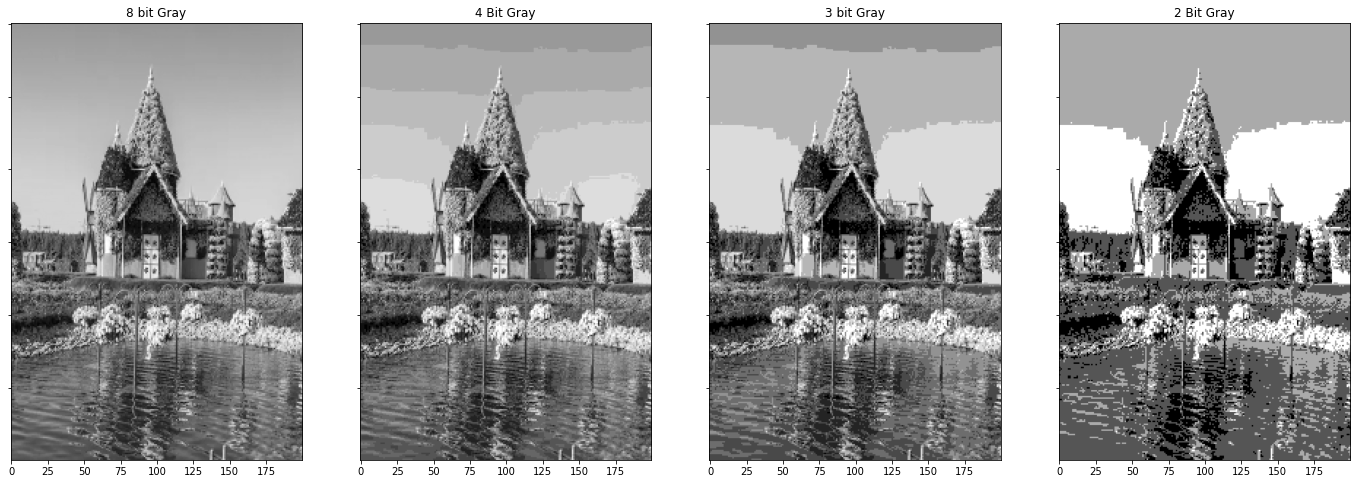

In [6]:
    (m,n) = image_g.shape 
    
    image_g1 = image_g.copy() 
    image_g2 = image_g.copy() 
    image_g3 = image_g.copy() 
            
    
    for i in range (0, m):
        for j in range (0, n):
            image_g1[i,j] = int (image_g1[i,j] /16)
            image_g2[i,j] = int (image_g2[i,j] /32)
            image_g3[i,j] = int (image_g3[i,j] /64)
        

    
    print("image intensity [8 bit] :",np.min (image_g),np.max (image_g))
    print("image intensity [4 bit] :",np.min (image_g1),np.max (image_g1))
    print("image intensity [8 bit] :",np.min (image_g2),np.max (image_g2))
    print("image intensity [4 bit] :",np.min (image_g3),np.max (image_g3))
    
    
    
    #print_image (image_g1)
    
    fig, axs = plt.subplots (1,4,figsize=(24,12))
    axs[0].imshow (image_g,cmap='gray')
    axs[1].imshow (image_g1,cmap='gray')
    
    axs[2].imshow (image_g2,cmap='gray')
    axs[3].imshow (image_g3,cmap='gray')
    
        
    axs[0].set_title ("8 bit Gray")
    axs[1].set_title ("4 Bit Gray")
    axs[2].set_title ("3 bit Gray")
    axs[3].set_title ("2 Bit Gray")
    
    for i in range (0, 4):
       axs[i].set_yticklabels([])
    plt.show()
    